# Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Main

## Reading the dataframe

In [2]:
energy_temp = pd.read_csv("data/data.csv", delimiter=';')
energy_temp.head()

,timestamp,indor1,indor2,indor3,external,flat,building,surface
0,20/02/01 00:00,"21,75","21,37","21,33",NaN,"0,09","0,67","417,00"
1,10/01/21 01:00,"21,70","21,34","21,33",NaN,"0,09","0,66","417,00"
2,10/01/21 02:00,"21,69","21,33","21,28",NaN,"0,09","0,65","417,00"
3,10/01/21 03:00,"21,60","21,31","21,23",NaN,"0,09","0,65","417,00"
4,10/01/21 04:00,"21,57","21,22","21,22",NaN,"0,09","0,65","417,00"


In [3]:
import pandas as pd

# Carica il dataset dal file CSV
energy_temp = pd.read_csv("data/data.csv", delimiter=';')

# Sostituisci virgole con punti nelle colonne specificate
columns_to_replace = ['indor1', 'indor2', 'indor3', 'external', 'flat', 'building', 'surface']
energy_temp[columns_to_replace] = energy_temp[columns_to_replace].replace(',', '.', regex=True)

# Converti le colonne in valori numerici
energy_temp[columns_to_replace] = energy_temp[columns_to_replace].apply(pd.to_numeric, errors='coerce')

# Aggiungi la colonna "stagione" in base al mese
energy_temp['timestamp'] = pd.to_datetime(energy_temp['timestamp'], format='%d/%m/%y %H:%M')
energy_temp['stagione'] = (energy_temp['timestamp'].dt.month % 12 + 3) // 3

# Aggiungi la colonna "ora" in base all'orario
energy_temp['ora'] = energy_temp['timestamp'].dt.hour


In [4]:
energy_temp

,timestamp,indor1,indor2,indor3,external,flat,building,surface,stagione,ora
0,2001-02-20 00:00:00,21.75,21.37,21.33,NaN,0.09,0.67,417.0,1,0
1,2021-01-10 01:00:00,21.70,21.34,21.33,NaN,0.09,0.66,417.0,1,1
2,2021-01-10 02:00:00,21.69,21.33,21.28,NaN,0.09,0.65,417.0,1,2
3,2021-01-10 03:00:00,21.60,21.31,21.23,NaN,0.09,0.65,417.0,1,3
4,2021-01-10 04:00:00,21.57,21.22,21.22,NaN,0.09,0.65,417.0,1,4
...,...,...,...,...,...,...,...,...,...,...
8542,2022-12-09 19:00:00,23.50,22.84,22.93,19.49,0.09,0.57,417.0,1,19
8543,2022-12-09 20:00:00,23.41,22.84,22.86,19.09,0.09,0.57,417.0,1,20
8544,2022-12-09 21:00:00,23.42,22.84,22.84,18.88,0.09,0.57,417.0,1,21
8545,2022-12-09 22:00:00,23.42,22.83,22.84,18.25,0.09,0.57,417.0,1,22


In [5]:
energy_temp.to_csv("/Users/marcovinciguerra/Github/NOI-hackathon/2_HVAC/data_exploration.csv")

In [6]:
print(energy_temp.dtypes)

timestamp    datetime64[ns]
indor1              float64
indor2              float64
indor3              float64
external            float64
flat                float64
building            float64
surface             float64
stagione              int32
ora                   int32
dtype: object


In [7]:
energy_temp['timestamp'] = pd.to_datetime(energy_temp['timestamp'], format='%d/%m/%y %H:%M')


In [8]:
print(energy_temp.dtypes)

timestamp    datetime64[ns]
indor1              float64
indor2              float64
indor3              float64
external            float64
flat                float64
building            float64
surface             float64
stagione              int32
ora                   int32
dtype: object


## Plot the time series

<Axes: >

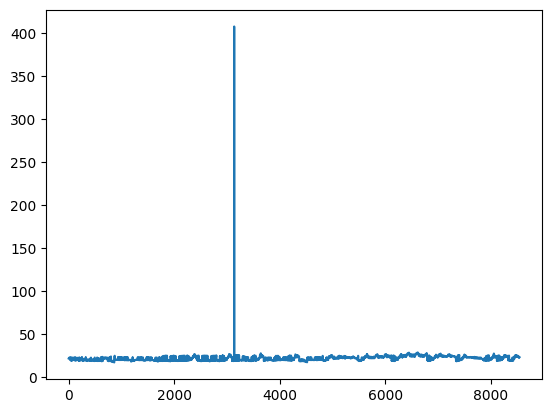

In [9]:
energy_temp['indor1'].plot()


<Axes: >

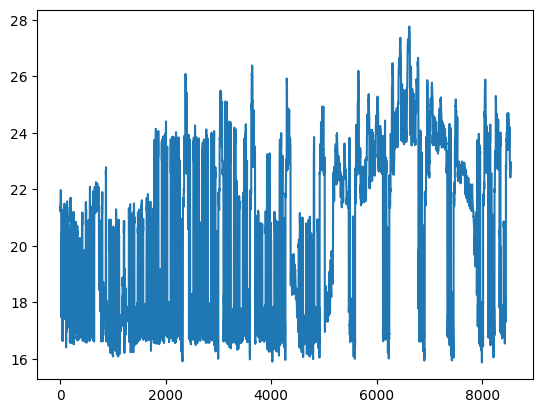

In [10]:
energy_temp['indor2'].plot()

<Axes: >

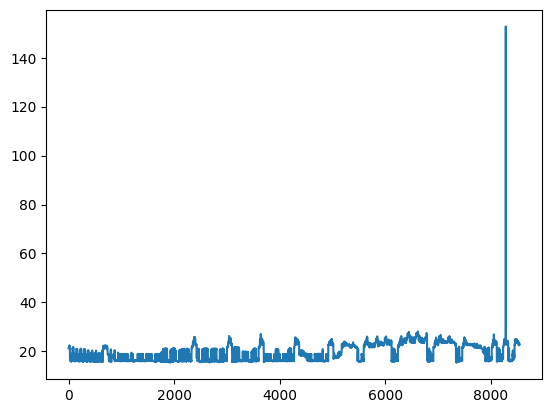

In [11]:
energy_temp['indor3'].plot()

<Axes: >

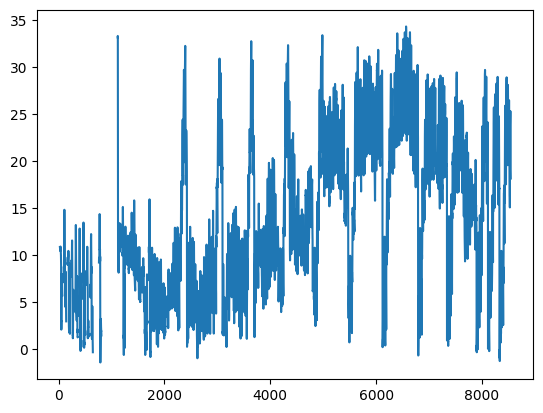

In [12]:
energy_temp['external'].plot()

<Axes: >

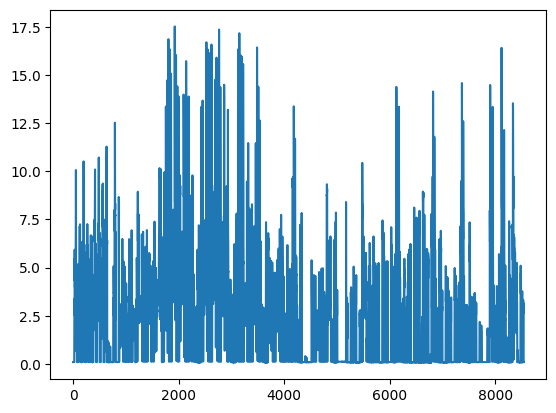

In [13]:
energy_temp['flat'].plot()

<Axes: >

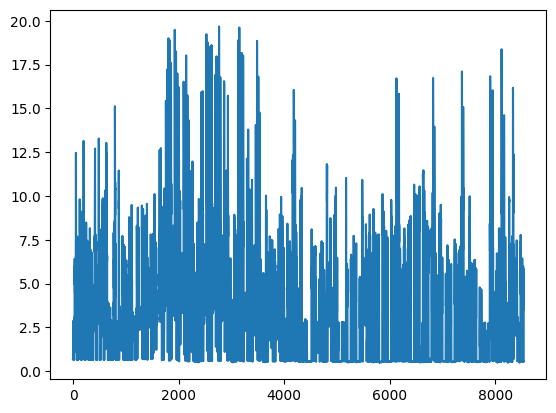

In [14]:
energy_temp['building'].plot()

<Axes: >

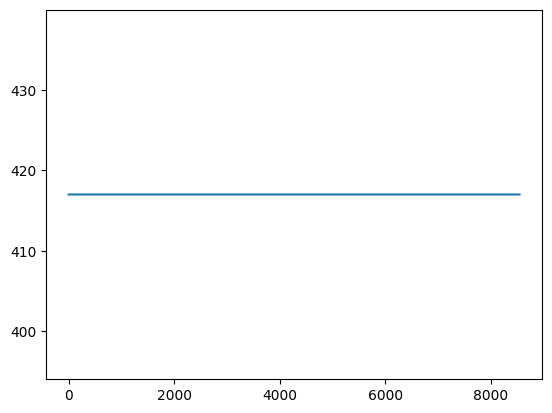

In [15]:
energy_temp['surface'].plot()

## Making the modification

## Reading the dataframe

In [16]:
import pandas as pd

# Carica il dataset dal file CSV
energy_temp = pd.read_csv("data/data.csv", delimiter=';')

# Sostituisci virgole con punti nelle colonne specificate
columns_to_replace = ['indor1', 'indor2', 'indor3', 'external', 'flat', 'building', 'surface']
energy_temp[columns_to_replace] = energy_temp[columns_to_replace].replace(',', '.', regex=True)

# Converti le colonne in valori numerici
energy_temp[columns_to_replace] = energy_temp[columns_to_replace].apply(pd.to_numeric, errors='coerce')

# Interpolazione lineare per i valori mancanti nella colonna 'external'
energy_temp['external'].interpolate(method='linear', inplace=True)

# Calcola il valore medio della colonna 'indor1' escludendo i valori superiori o uguali a 100
mean_indor1 = energy_temp.loc[energy_temp['indor1'] < 100, 'indor1'].mean()

# Sostituisci i valori nella colonna 'indor1' che sono inferiori a 100 con il valore medio
energy_temp.loc[energy_temp['indor1'] > 100, 'indor1'] = mean_indor1

# Calcola il valore medio della colonna 'indor3' escludendo i valori superiori o uguali a 100
mean_indor3 = energy_temp.loc[energy_temp['indor3'] < 100, 'indor3'].mean()

# Sostituisci i valori nella colonna 'indor3' che sono inferiori a 100 con il valore medio
energy_temp.loc[energy_temp['indor3'] > 100, 'indor3'] = mean_indor3

# Mostra le prime righe del DataFrame
print(energy_temp.head())


        timestamp  indor1  indor2  indor3  external  flat  building  surface
0  20/02/01 00:00   21.75   21.37   21.33       NaN  0.09      0.67    417.0
1  10/01/21 01:00   21.70   21.34   21.33       NaN  0.09      0.66    417.0
2  10/01/21 02:00   21.69   21.33   21.28       NaN  0.09      0.65    417.0
3  10/01/21 03:00   21.60   21.31   21.23       NaN  0.09      0.65    417.0
4  10/01/21 04:00   21.57   21.22   21.22       NaN  0.09      0.65    417.0


In [17]:
energy_temp

,timestamp,indor1,indor2,indor3,external,flat,building,surface
0,20/02/01 00:00,21.75,21.37,21.33,NaN,0.09,0.67,417.0
1,10/01/21 01:00,21.70,21.34,21.33,NaN,0.09,0.66,417.0
2,10/01/21 02:00,21.69,21.33,21.28,NaN,0.09,0.65,417.0
3,10/01/21 03:00,21.60,21.31,21.23,NaN,0.09,0.65,417.0
4,10/01/21 04:00,21.57,21.22,21.22,NaN,0.09,0.65,417.0
...,...,...,...,...,...,...,...,...
8542,09/12/22 19:00,23.50,22.84,22.93,19.49,0.09,0.57,417.0
8543,09/12/22 20:00,23.41,22.84,22.86,19.09,0.09,0.57,417.0
8544,09/12/22 21:00,23.42,22.84,22.84,18.88,0.09,0.57,417.0
8545,09/12/22 22:00,23.42,22.83,22.84,18.25,0.09,0.57,417.0


In [18]:
energy_temp.to_csv("/Users/marcovinciguerra/Github/NOI-hackathon/2_HVAC/data_exploration.csv")

In [19]:
print(energy_temp.dtypes)

timestamp     object
indor1       float64
indor2       float64
indor3       float64
external     float64
flat         float64
building     float64
surface      float64
dtype: object


In [20]:
energy_temp['timestamp'] = pd.to_datetime(energy_temp['timestamp'], format='%d/%m/%y %H:%M')


In [21]:
print(energy_temp.dtypes)

timestamp    datetime64[ns]
indor1              float64
indor2              float64
indor3              float64
external            float64
flat                float64
building            float64
surface             float64
dtype: object


In [22]:
energy_temp.head()

,timestamp,indor1,indor2,indor3,external,flat,building,surface
0,2001-02-20 00:00:00,21.75,21.37,21.33,NaN,0.09,0.67,417.0
1,2021-01-10 01:00:00,21.70,21.34,21.33,NaN,0.09,0.66,417.0
2,2021-01-10 02:00:00,21.69,21.33,21.28,NaN,0.09,0.65,417.0
3,2021-01-10 03:00:00,21.60,21.31,21.23,NaN,0.09,0.65,417.0
4,2021-01-10 04:00:00,21.57,21.22,21.22,NaN,0.09,0.65,417.0


<Axes: >

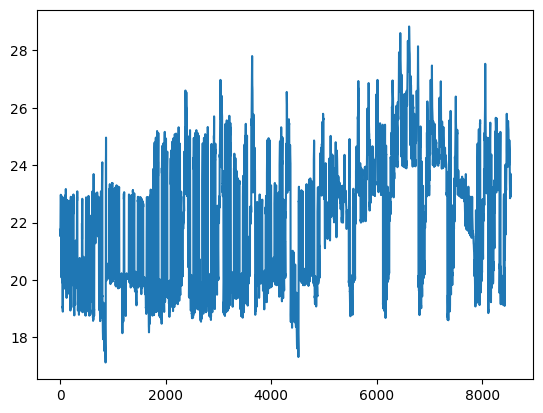

In [23]:
energy_temp['indor1'].plot()

<Axes: >

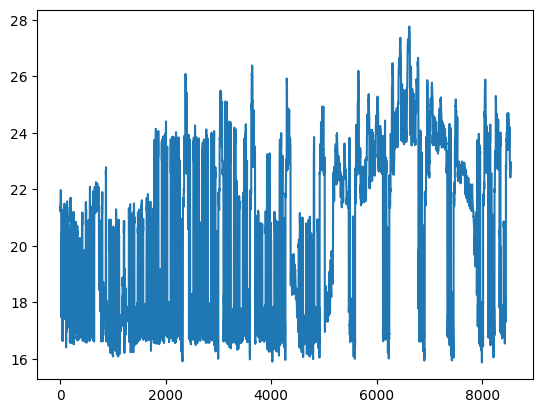

In [24]:
energy_temp['indor2'].plot()

<Axes: >

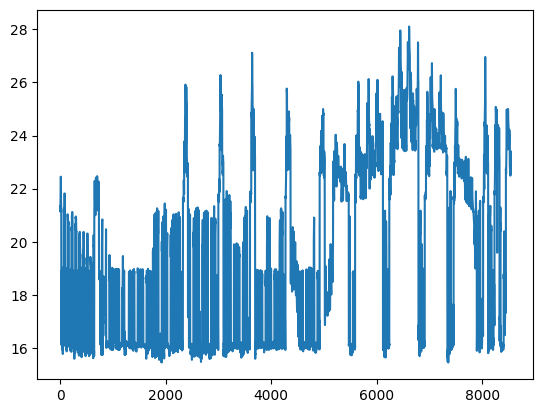

In [25]:
energy_temp['indor3'].plot()

<Axes: >

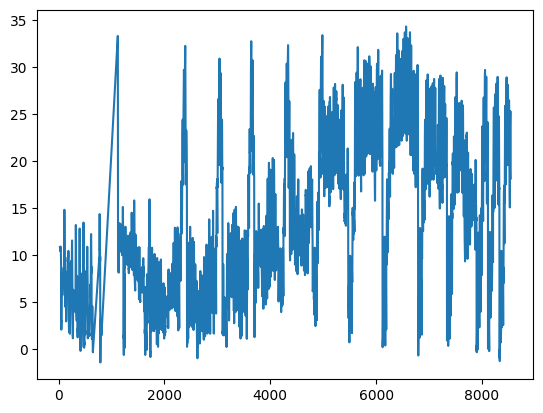

In [26]:
energy_temp['external'].plot()

<Axes: >

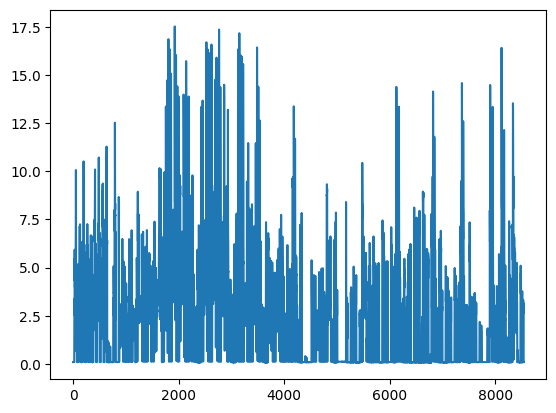

In [27]:
energy_temp['flat'].plot()

<Axes: >

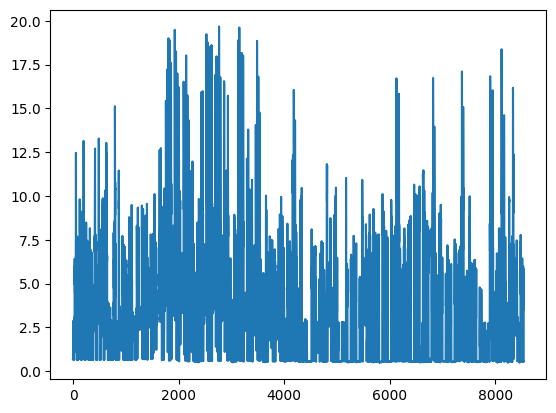

In [28]:
energy_temp['building'].plot()

<Axes: >

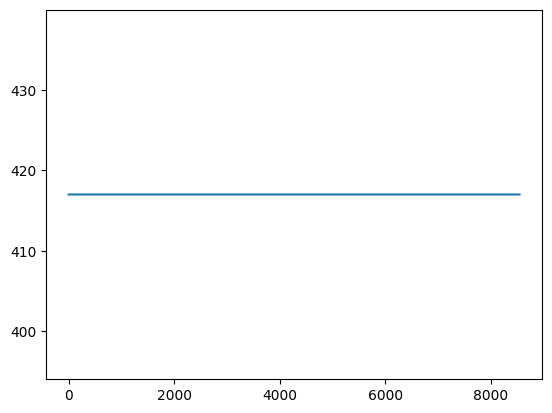

In [29]:
energy_temp['surface'].plot()